Orfipy is a tool written in python/cython to extract ORFs in an extremely and fast and flexible manner.

In [ ]:
!pip3 install orfipy

# ORF Finder

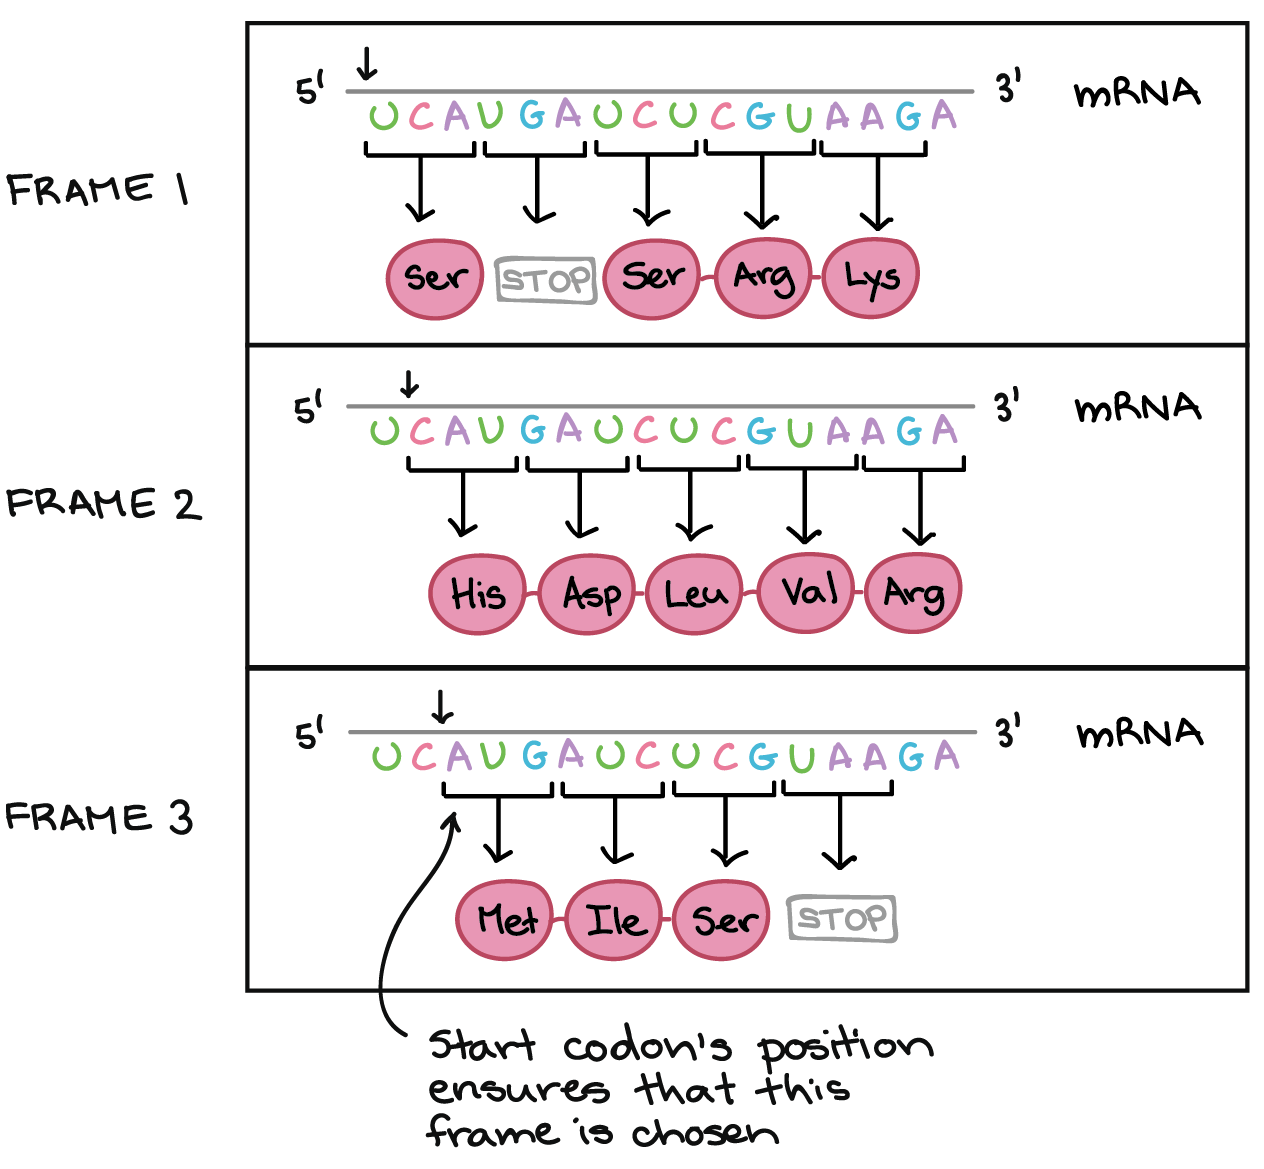

So, how does a cell know which of these protein to make? The start codon is the key signal. Because translation begins at the start codon and continues in successive groups of three, the position of the start codon ensures that the mRNA is read in the correct frame (Frame 3).

In [1]:
import re
import orfipy_core 
from Bio import Seq, SeqUtils, SeqIO

In [2]:
start_codon_dict = {}
stop_codon_dict = {}

In [3]:
def read_record(file_name: str) -> str:
        record = SeqIO.read(file_name, "fasta")
        return str(record.seq)

In [4]:
seq = read_record('sequence.txt')

In [8]:
def find_codon(input_dict: dict) -> int:
    track={}
    for key,value in input_dict.items():
        if value not in track:
            track[value]=0
        else:
            track[value]+=1

    return max(track,key=track.get)

In [9]:
for start,stop,strand,description in orfipy_core.orfs(seq, minlen=3,maxlen=1000):
    start_cod = re.findall(r'Start:(\w+)', description)
    start_codon_dict[start] = start_cod[0]
    
    stop_cod = re.findall(r'Stop:(\w+)', description)
    stop_codon_dict[stop] = stop_cod[0]

In [10]:
print("Start codon" + " " + find_codon(start_codon_dict))

start codon TTG


In [11]:
print("Stop codon" + " " + find_codon(stop_codon_dict))

stop codon TGA
